In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from numpy import dtype
import pandas as pd

# PM.25 data source:
data_html = 'https://sites.wustl.edu/acag/datasets/surface-pm2-5/'

# open a netCDF file to read
filename = "V5GL04.HybridPM25.Asia.201501-201512.nc"
ncin = Dataset(filename, 'r', format='NETCDF4')

In [2]:
print(ncin.variables.keys())

dict_keys(['lon', 'lat', 'GWRPM25'])


In [3]:
pm25 = ncin.variables['GWRPM25'][:]
lat = ncin.variables['lat'][:]
lon = ncin.variables['lon'][:]

In [4]:
# check dimensions
print(pm25.shape)
print(lat.shape)
print(lon.shape)

(5500, 8000)
(5500,)
(8000,)


In [5]:
import xarray as xr

# Assuming you have already loaded the data into pm25, lat, and lon arrays

# Create xarray DataArray objects
pm25_da = xr.DataArray(pm25, dims=('lat', 'lon'),
                       coords={'lat': lat, 'lon': lon})
lat_da = xr.DataArray(lat, dims=('lat',), coords={'lat': lat})
lon_da = xr.DataArray(lon, dims=('lon',), coords={'lon': lon})

# Create an xarray Dataset
dataset = xr.Dataset({'pm25': pm25_da, 'lat': lat_da, 'lon': lon_da})

# Print the dataset
print(dataset)

<xarray.Dataset>
Dimensions:  (lat: 5500, lon: 8000)
Coordinates:
  * lat      (lat) float64 -9.995 -9.985 -9.975 -9.965 ... 44.97 44.99 44.99
  * lon      (lon) float64 65.0 65.01 65.03 65.04 ... 145.0 145.0 145.0 145.0
Data variables:
    pm25     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan


In [7]:
# Convert xarray Dataset to pandas DataFrame
df = dataset.to_dataframe()

# Reset index to convert MultiIndex to regular columns
df_reset = df.reset_index()

# Melt the DataFrame to long form
df_long = df_reset.melt(id_vars=['lat', 'lon'],
                        var_name='variable', value_name='value')

# Display the DataFrame
print(df_long)

                lat         lon variable  value
0         -9.995000   65.004997     pm25    NaN
1         -9.995000   65.014999     pm25    NaN
2         -9.995000   65.025002     pm25    NaN
3         -9.995000   65.035004     pm25    NaN
4         -9.995000   65.044998     pm25    NaN
...             ...         ...      ...    ...
43999995  44.994999  144.955002     pm25    NaN
43999996  44.994999  144.964996     pm25    NaN
43999997  44.994999  144.975006     pm25    NaN
43999998  44.994999  144.985001     pm25    NaN
43999999  44.994999  144.994995     pm25    NaN

[44000000 rows x 4 columns]


In [8]:
# check how many missing values are in the df_long['value'] column
print(df_long['value'].isna().sum())
# check how many not misisng values
print(df_long['value'].notna().sum())

25327086
18672914


<Axes: >

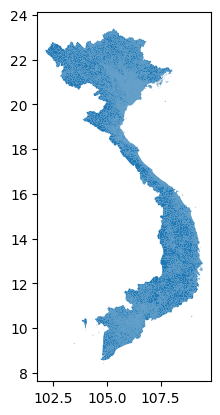

In [10]:
import geopandas as gpd

# myanmar lat and lon dataset
geojson_file = 'gadm41_VNM_3.json'


# Read in the GeoJSON file
gdata = gpd.read_file(geojson_file)

# Plot the GeoDataFrame
gdata.plot()

In [11]:
gdata

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,VNM.1.1.1_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,AnPhú,AnPhu,NA,Thịtrấn,Townlet,NA,NA,"MULTIPOLYGON (((105.10720 10.77730, 105.09440 ..."
1,VNM.1.1.2_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,ĐaPhước,DaPhuoc,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.09440 10.76980, 105.10720 ..."
2,VNM.1.1.3_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,KhánhAn,KhanhAn,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.11300 10.96200, 105.11660 ..."
3,VNM.1.1.4_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,KhánhBình,KhanhBinh,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.03690 10.89690, 105.04500 ..."
4,VNM.1.1.5_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,LongBình,LongBinh,NA,Thịtrấn,Townlet,NA,NA,"MULTIPOLYGON (((105.08350 10.95710, 105.09570 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,VNM.63.9.22_1,VNM,Vietnam,VNM.63_1,YênBái,NA,VNM.63.9_1,YênBình,NA,XuânLai,XuanLai,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((104.98650 21.93640, 104.98970 ..."
11159,VNM.63.9.23_1,VNM,Vietnam,VNM.63_1,YênBái,NA,VNM.63.9_1,YênBình,NA,XuânLong,XuanLong,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((104.95870 22.03360, 104.96240 ..."
11160,VNM.63.9.24_1,VNM,Vietnam,VNM.63_1,YênBái,NA,VNM.63.9_1,YênBình,NA,YênBình(Thịtrấn),YenBinh,NA,Thịtrấn,Townlet,NA,NA,"MULTIPOLYGON (((104.95370 21.72460, 104.95450 ..."
11161,VNM.63.9.25_1,VNM,Vietnam,VNM.63_1,YênBái,NA,VNM.63.9_1,YênBình,NA,YênBình(Xã),YenBinh,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.07740 21.78630, 105.07140 ..."


In [12]:
# copy only NAME_1 and geometry columns
gdata_truc = gdata[['NAME_1', 'geometry']]
gdata_truc

,NAME_1,geometry
0,AnGiang,"MULTIPOLYGON (((105.10720 10.77730, 105.09440 ..."
1,AnGiang,"MULTIPOLYGON (((105.09440 10.76980, 105.10720 ..."
2,AnGiang,"MULTIPOLYGON (((105.11300 10.96200, 105.11660 ..."
3,AnGiang,"MULTIPOLYGON (((105.03690 10.89690, 105.04500 ..."
4,AnGiang,"MULTIPOLYGON (((105.08350 10.95710, 105.09570 ..."
...,...,...
11158,YênBái,"MULTIPOLYGON (((104.98650 21.93640, 104.98970 ..."
11159,YênBái,"MULTIPOLYGON (((104.95870 22.03360, 104.96240 ..."
11160,YênBái,"MULTIPOLYGON (((104.95370 21.72460, 104.95450 ..."
11161,YênBái,"MULTIPOLYGON (((105.07740 21.78630, 105.07140 ..."


In [13]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(gdata_truc)

# Define lists to store latitudes and longitudes
lats = []
lons = []
names = []  # List to store repeated NAME_1 values

# Iterate through each row
for index, row in gdf.iterrows():
    # Get the geometry
    geometry = row['geometry']
    name = row['NAME_1']  # Get the NAME_1 value for the row
    # If it's a MultiPolygon, iterate through its constituent polygons
    if geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:
            # Extract coordinates
            coords = polygon.exterior.coords
            # Separate latitudes and longitudes
            latitudes = [coord[1] for coord in coords]
            longitudes = [coord[0] for coord in coords]
            # Extend the lists
            lats.extend(latitudes)
            lons.extend(longitudes)
            # Repeat NAME_1 for the corresponding number of coordinates
            names.extend([name] * len(latitudes))
    # If it's a Polygon, extract coordinates directly
    elif geometry.geom_type == 'Polygon':
        coords = geometry.exterior.coords
        latitudes = [coord[1] for coord in coords]
        longitudes = [coord[0] for coord in coords]
        lats.extend(latitudes)
        lons.extend(longitudes)
        names.extend([name] * len(latitudes))

# Create a DataFrame for latitudes, longitudes, and repeated names
coordinates_df = pd.DataFrame(
    {'NAME_1': names, 'lat': lats, 'lon': lons})

# Display the DataFrame
print(coordinates_df)

         NAME_1      lat       lon
0       AnGiang  10.7773  105.1072
1       AnGiang  10.7698  105.0944
2       AnGiang  10.7780  105.0838
3       AnGiang  10.7813  105.0840
4       AnGiang  10.7880  105.0876
...         ...      ...       ...
381194   YênBái  21.8983  104.9784
381195   YênBái  21.8934  104.9810
381196   YênBái  21.8929  104.9957
381197   YênBái  21.8990  105.0092
381198   YênBái  21.8993  105.0139

[381199 rows x 3 columns]


In [14]:
# return the unique values in the NAME_1 column
unique_names = coordinates_df['NAME_1'].unique()

# loop through the unique names, return the max and min values of the lat and lon columns
# and save them in a new DataFrame

# Create an empty list to store the results
results = []

# Iterate through the unique names
for name in unique_names:
    # Get the subset of the DataFrame for the current name
    subset = coordinates_df[coordinates_df['NAME_1'] == name]
    # Get the maximum and minimum latitudes and longitudes
    max_lat = subset['lat'].max()
    min_lat = subset['lat'].min()
    max_lon = subset['lon'].max()
    min_lon = subset['lon'].min()
    # Append the results as a dictionary to the list
    results.append({'NAME_1': name, 'max_lat': max_lat, 'min_lat': min_lat,
                    'max_lon': max_lon, 'min_lon': min_lon})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

           NAME_1  max_lat  min_lat   max_lon   min_lon
0         AnGiang  10.9620  10.1836  105.5753  104.7784
1   BàRịa-VũngTàu  10.8045  10.3203  107.5714  106.9962
2        BắcGiang  21.6263  21.1216  107.0336  105.8808
3          BắcKạn  22.7412  21.8045  106.2471  105.4311
4         BạcLiêu   9.6374   9.0172  105.8605  105.2326
..            ...      ...      ...       ...       ...
58        TràVinh  10.0811   9.5292  106.6124  105.9525
59     TuyênQuang  22.6978  21.4976  105.5987  104.8490
60       VĩnhLong  10.3312   9.8838  106.2897  105.6823
61       VĩnhPhúc  21.5738  21.1542  105.7861  105.3225
62         YênBái  22.2913  21.3259  105.1003  103.8860

[63 rows x 5 columns]


In [15]:
# if the lat and lon values are within the range of the max and min values of the lat and lon columns
# then return the mean of all non-empty values in the value column of df_long and add it to the results_df

# Create an empty list to store the results
final_results = []

# Iterate through the rows of the results DataFrame
for index, row in results_df.iterrows():
    # Get the name, max_lat, min_lat, max_lon, and min_lon values
    name = row['NAME_1']
    max_lat = row['max_lat']
    min_lat = row['min_lat']
    max_lon = row['max_lon']
    min_lon = row['min_lon']
    # Get the subset of the DataFrame for the current name
    subset = df_long[(df_long['lat'] <= max_lat) & (df_long['lat'] >= min_lat) &
                     (df_long['lon'] <= max_lon) & (df_long['lon'] >= min_lon)]
    # Calculate the mean of the non-empty values in the 'value' column
    mean_value = subset['value'].mean()
    # Append the results as a dictionary to the list
    final_results.append({'NAME_1': name, 'mean_pm25': mean_value})

# Convert the list of dictionaries to a DataFrame
final_results_df = pd.DataFrame(final_results)

# export to csv
# final_results_df.to_csv('final_results.csv', index=False)

In [16]:
# add the 'mean_pm25' to the gdata DataFrame
gdata_pm = gdata.merge(final_results_df, on='NAME_1')
gdata_pm

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,mean_pm25
0,VNM.1.1.1_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,AnPhú,AnPhu,NA,Thịtrấn,Townlet,NA,NA,"MULTIPOLYGON (((105.10720 10.77730, 105.09440 ...",19.718000
1,VNM.1.1.2_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,ĐaPhước,DaPhuoc,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.09440 10.76980, 105.10720 ...",19.718000
2,VNM.1.1.3_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,KhánhAn,KhanhAn,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.11300 10.96200, 105.11660 ...",19.718000
3,VNM.1.1.4_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,KhánhBình,KhanhBinh,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.03690 10.89690, 105.04500 ...",19.718000
4,VNM.1.1.5_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,LongBình,LongBinh,NA,Thịtrấn,Townlet,NA,NA,"MULTIPOLYGON (((105.08350 10.95710, 105.09570 ...",19.718000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,VNM.63.9.22_1,VNM,Vietnam,VNM.63_1,YênBái,NA,VNM.63.9_1,YênBình,NA,XuânLai,XuanLai,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((104.98650 21.93640, 104.98970 ...",35.940834
11159,VNM.63.9.23_1,VNM,Vietnam,VNM.63_1,YênBái,NA,VNM.63.9_1,YênBình,NA,XuânLong,XuanLong,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((104.95870 22.03360, 104.96240 ...",35.940834
11160,VNM.63.9.24_1,VNM,Vietnam,VNM.63_1,YênBái,NA,VNM.63.9_1,YênBình,NA,YênBình(Thịtrấn),YenBinh,NA,Thịtrấn,Townlet,NA,NA,"MULTIPOLYGON (((104.95370 21.72460, 104.95450 ...",35.940834
11161,VNM.63.9.25_1,VNM,Vietnam,VNM.63_1,YênBái,NA,VNM.63.9_1,YênBình,NA,YênBình(Xã),YenBinh,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.07740 21.78630, 105.07140 ...",35.940834


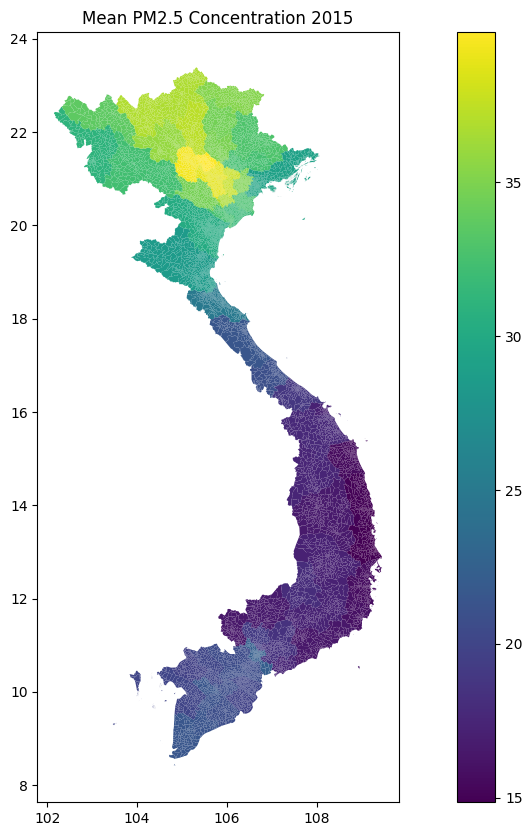

In [19]:
# plot the mean_pm25 values on the map
gdata_pm.plot(column='mean_pm25', legend=True, figsize=(15, 10))

# Add a title
plt.title('Mean PM2.5 Concentration 2015')

# Show the plot
plt.show()